# HW5_201723371_강지애

## 8주차 - 텍스트마이닝-Classification 실습

# 1. featureset - bagofwords, tfidf, countvector

In [1]:
# 주어진 문서(word tokenize된 결과)에 대해 feature set을 dictionary 형태로 구성해서 반환
def bag_of_words(words):
    return dict([(word, True) for word in words]) #있는 단어들에 대해 True로 표시, 없는 단어는 표시 안 함

In [3]:
bag_of_words(['the', 'quick', 'brown', 'fox'])

{'the': True, 'quick': True, 'brown': True, 'fox': True}

## NLTK Corpus
### movie_reviews
NLTK Corpus 중 movie review 수집 데이터로, 감성분석 결과(pos, neg)가 label로 붙어 있음

In [5]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print(movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print(movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('"neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('"pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('id:', fileid)
print(movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print(movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print(movie_reviews.words(fileid)[:10]) #첫번째 문서를 word tokenize한 결과 중 앞 열 단어


review count: 2000
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
['neg', 'pos']
"neg" reviews: 1000
"pos" reviews: 1000
id: neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Jiae\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Jiae/nltk_data'
    - 'C:\\Users\\Jiae\\anaconda3\\nltk_data'
    - 'C:\\Users\\Jiae\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Jiae\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Jiae\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


#### bag of words model을 이용한 feature 추출 첫번째 방법
label 별로 각 문서들에 대한 feature를 생성 - bag_of_words() 함수를 이용

하나의 label(ex. 'neg')에 1,000개의 feature set을 할당해야 하므로 단순 dictionary가 아닌 container를 사용. 각 feature는 dictionary로 이루어져 있음

In [7]:
import collections

#feature 추출을 위한 함수로, 앞서 정의한 bag_of_words()를 사용
def label_feats_from_corpus(corp, feature_detector=bag_of_words): 
    label_feats = collections.defaultdict(list) # container 초기화
    for label in corp.categories(): #''neg', 'pos' 각 label에 대해
        for fileid in corp.fileids(categories=[label]): #각 label에 해당하는 문서들에 대해
            feats = feature_detector(corp.words(fileids=[fileid])) #주어진 문서를 bag_of_words feature로 변환
            label_feats[label].append(feats) #container에 feature 추가
    return label_feats

lfeats = label_feats_from_corpus(movie_reviews)
print(lfeats.keys())

dict_keys(['neg', 'pos'])


In [9]:
len(lfeats['neg'])

1000

In [11]:
", ".join(lfeats['neg'][0])

'plot, :, two, teen, couples, go, to, a, church, party, ,, drink, and, then, drive, ., they, get, into, an, accident, one, of, the, guys, dies, but, his, girlfriend, continues, see, him, in, her, life, has, nightmares, what, \', s, deal, ?, watch, movie, ", sorta, find, out, critique, mind, -, fuck, for, generation, that, touches, on, very, cool, idea, presents, it, bad, package, which, is, makes, this, review, even, harder, write, since, i, generally, applaud, films, attempt, break, mold, mess, with, your, head, such, (, lost, highway, &, memento, ), there, are, good, ways, making, all, types, these, folks, just, didn, t, snag, correctly, seem, have, taken, pretty, neat, concept, executed, terribly, so, problems, well, its, main, problem, simply, too, jumbled, starts, off, normal, downshifts, fantasy, world, you, as, audience, member, no, going, dreams, characters, coming, back, from, dead, others, who, look, like, strange, apparitions, disappearances, looooot, chase, scenes, tons, we

In [13]:
lfeats['neg'][0]

{'plot': True,
 ':': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'to': True,
 'a': True,
 'church': True,
 'party': True,
 ',': True,
 'drink': True,
 'and': True,
 'then': True,
 'drive': True,
 '.': True,
 'they': True,
 'get': True,
 'into': True,
 'an': True,
 'accident': True,
 'one': True,
 'of': True,
 'the': True,
 'guys': True,
 'dies': True,
 'but': True,
 'his': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'him': True,
 'in': True,
 'her': True,
 'life': True,
 'has': True,
 'nightmares': True,
 'what': True,
 "'": True,
 's': True,
 'deal': True,
 '?': True,
 'watch': True,
 'movie': True,
 '"': True,
 'sorta': True,
 'find': True,
 'out': True,
 'critique': True,
 'mind': True,
 '-': True,
 'fuck': True,
 'for': True,
 'generation': True,
 'that': True,
 'touches': True,
 'on': True,
 'very': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'it': True,
 'bad': True,
 'package': True,
 'which': True,
 'is': True,
 'makes': True

#### bag of words model을 이용한 feature 추출 두번째 방법
1. 각 문서를 먼저 word list와 label의 list로 변환
2. feature 추출 대상이 되는 단어 집합 구성 - 이 때 전체 words들에 대한 frequency data를 이용해 상위 n개의 단어만으로 feature 구성이 가능
3. 각 문서에 대해 feature 추출 대상 단어들을 대상으로 해당 단어가 문서에 있는 지의 여부를 dictionary로 생성
4. 생성된 feature와 label로 문서들에 대한 feature set을 구성

In [15]:
from nltk.corpus import movie_reviews
import random
# category 별로 fileid를 추출하고, 해당 fileid에 대해 문서의 word tokenize된 결과를 가져와서 
# documents 집합을 구성
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [16]:
#nltk FreqDist 함수를 이용하여 단어별로 빈도 수를 계산
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [17]:
for word in list(all_words)[:10]:
    print(word, all_words[word])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822


In [18]:
sorted_features = sorted(all_words, key=all_words.get, reverse=True)
for word in sorted_features[:10]:
    print(word, all_words[word])
print(sorted_features[:10])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822
[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in']


In [19]:
word_features = sorted_features[:2000] #빈도가 높은 상위 2000개의 단어만 추출하여 features를 구성

print(word_features[:100])

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [21]:
#주어진 document를 feature로 변환하는 함수, word_features를 사용
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words) #2000개의 단어에 대해 True, False로 입력
    return features

In [23]:
#위에서 만든 documents 집합에 대해 feature set을 생성
featuresets = [(document_features(d, word_features), c) for (d,c) in documents]

In [24]:
print(len(featuresets[0][0])) #첫째 feature set의 첫째 element 즉 bag_of_words feature의 수 - 상위 2000개 단어
print(featuresets[0][1]) #첫째 feature set의 둘째 element 즉 label
print(featuresets[0][0]) # 첫째 feature set의 내용


2000
pos
{',': True, 'the': True, '.': True, 'a': True, 'and': True, 'of': True, 'to': True, "'": True, 'is': True, 'in': True, 's': True, '"': True, 'it': True, 'that': True, '-': True, ')': True, '(': True, 'as': True, 'with': True, 'for': True, 'his': True, 'this': True, 'film': True, 'i': True, 'he': True, 'but': True, 'on': True, 'are': True, 't': True, 'by': True, 'be': True, 'one': True, 'movie': True, 'an': True, 'who': True, 'not': True, 'you': True, 'from': True, 'at': True, 'was': True, 'have': True, 'they': True, 'has': True, 'her': True, 'all': True, '?': True, 'there': True, 'like': True, 'so': False, 'out': True, 'about': True, 'up': True, 'more': True, 'what': True, 'when': True, 'which': True, 'or': True, 'she': True, 'their': True, ':': False, 'some': True, 'just': True, 'can': True, 'if': True, 'we': True, 'him': False, 'into': True, 'even': True, 'only': False, 'than': True, 'no': True, 'good': True, 'time': False, 'most': True, 'its': False, 'will': False, 'story':

### BOW feature set을 이용한 분류 맛보기


In [26]:
train_set, test_set = featuresets[100:], featuresets[:100] #train set과 test set으로 분리

classifier = nltk.NaiveBayesClassifier.train(train_set) # train set으로 학습
print(nltk.classify.accuracy(classifier, test_set)) # test set으로 분류기 성능을 평가
classifier.show_most_informative_features(5) #분류기에서 가장 중요한 영향을 미치는 단어 상위 5개

0.8
Most Informative Features
             outstanding = True              pos : neg    =     10.7 : 1.0
                   mulan = True              pos : neg    =      8.4 : 1.0
             wonderfully = True              pos : neg    =      7.5 : 1.0
                  seagal = True              neg : pos    =      6.9 : 1.0
                   damon = True              pos : neg    =      6.2 : 1.0


In [27]:
testfeat = bag_of_words(['the', 'actor', 'was', 'seagal']) 
print(classifier.classify(testfeat))
testfeat = bag_of_words(['the', 'story', 'was', 'outstanding'])
print(classifier.classify(testfeat))
negfeat = bag_of_words(['the', 'plot', 'was', 'ludicrous']) # 터무니없는
print(classifier.classify(negfeat))
posfeat = bag_of_words(['kate', 'winslet', 'is', 'accessible']) # 이해가 돼!
print(classifier.classify(posfeat))

neg
pos
neg
pos


## Count Vector with Scikit


In [28]:
# data 준비, 입력이 raw text임
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
cv = CountVectorizer(vocabulary=word_features) #빈도수 상위 2,000개의 단어만 사용하여 count vector 객체를 생성
print(cv) #객체 parameter들을 확인

CountVectorizer(vocabulary=[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is',
                            'in', 's', '"', 'it', 'that', '-', ')', '(', 'as',
                            'with', 'for', 'his', 'this', 'film', 'i', 'he',
                            'but', 'on', 'are', 't', 'by', ...])


In [32]:
print('reviews count:', len(reviews))

reviews count: 2000


In [36]:
X = cv.fit_transform(reviews) #review를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names()[:100]) # count vector에 사용된 feature 이름을 반환

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [38]:
print(X[0].toarray()[0, :100]) #변환된 결과의 첫째 feature set 중에서 앞 100개를 출력
print(max(X[0].toarray()[0])) #변환된 결과의 첫째 feature set 중에서 max 값

[ 0 38  0  0 20 16 16  0 12  8  0  0 25 13  0  0  0  1  5  4  1 10  6  0
  1 10  4 13  0  2  1  3  6  3  3  3  3  4  0  0  2  5  3  4  6  0 10  3
  3  3  2  2  2  4  1  4  2  0  0  0  0  4  0  0  4  1  5  3  1  0  1  2
  0  4  4  0  0  1  2  0  2  1  3  0  2  2  1  0  2  1  0  0  0  2  2  0
  3  2  5  1]
38


In [40]:
for word, count in zip(cv.get_feature_names()[:20], X[0].toarray()[0, :20]):
    print(word, ':', count)

, : 0
the : 38
. : 0
a : 0
and : 20
of : 16
to : 16
' : 0
is : 12
in : 8
s : 0
" : 0
it : 25
that : 13
- : 0
) : 0
( : 0
as : 1
with : 5
for : 4


## 문서 간 유사도 계산 및 가장 유사한 문서 검색
### Cosine similarity
(Wikipedia) a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.
![alt text](https://hsto.org/files/f73/289/979/f732899792f246358649e89765cd88da.png "cos")

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

## 문서 간 유사도 계산 및 가장 유사한 문서 검색
### Cosine similarity
(Wikipedia) a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.
![alt text](https://hsto.org/files/f73/289/979/f732899792f246358649e89765cd88da.png "cos")

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

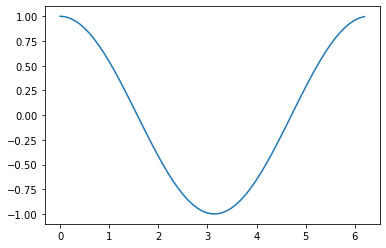

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

new_review = "first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation. they are small pokemon with a powerful punch and have great psychic abilities"
new_vec = cv.transform([new_review]) #문서를 count vector로 변환

sim_result = cosine_similarity(new_vec, X) #변환된 count vector와 기존 값들과의 similarity 계산

In [46]:
# https://docs.python.org/3/howto/sorting.html
print(sorted(sim_result[0], reverse=True)[:10])

[0.47404152357849716, 0.4354705693078365, 0.4179484687443539, 0.40669013197195214, 0.4042441311205991, 0.4031257527594671, 0.39316730570210306, 0.38744458895341755, 0.3852303002224743, 0.384468719848977]


In [48]:
import numpy as np
np.argmax(sim_result[0])

679

In [50]:
print(reviews[679])

 " pokemon 3 : the movie " has a lot of bad things in it . 
first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation . 
the first film came out the end of 1999 and was a huge hit grossing almost $90 million domestically . 
a sequel soon followed and even made $45 million . 
warner has released their third movie based on the immensely popular video game and tv series and its a waste of time and celluloid . 
this time ash ketchum and his friends are on their way to the johto battles ( which my little brother told me the new spinoff is " pokemon : the johto journeys " so go figure ) anyway he comes in contact with a young girl who's father has disappeared after trying to discover the unown . 
they are small pokemon with a powerful punch and have great psychic abilities . 
the unown bring together their psychic abilities and create entei a powerful legendary pokemon who barriers young molly's house and creates every wish she wants . 
now

In [52]:
(-sim_result[0]).argsort()[:10]

array([ 679,  176, 1152, 1575,  952,  470,  688, 1144,  103,  159],
      dtype=int64)

## TFIDF with Scikit
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

기존에 만든 count vector로부터 TFIDF vector로 변환
Count vector를 거치지 않고 처음부터 TFIDF vector를 생성하는 것도 가능함 -> 나중에

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True)
transformer

TfidfTransformer()

In [58]:
X_tfidf = transformer.fit_transform(X)
print(X_tfidf.shape)
print('max count score of the first vector:', max(X[0].toarray()[0]))
print('max tfidf score of the first vector:', max(X_tfidf[0].toarray()[0]))

(2000, 2000)
max count score of the first vector: 38
max tfidf score of the first vector: 0.3958279594831942


In [60]:
new_tfidf = transformer.transform(new_vec)
sim_result_tf = cosine_similarity(new_tfidf, X_tfidf)
np.argmax(sim_result_tf[0])

679

In [61]:
print(sorted(sim_result_tf[0], reverse=True)[:10])

[0.39386919931415737, 0.2158533727955655, 0.2055888622850777, 0.18940610744482467, 0.18862790397285573, 0.18841943811025338, 0.18329868368380425, 0.1810784645715442, 0.17853711709135542, 0.17620991687411133]


In [62]:
#count vector에 대한 유사도 상위 문서와 tfidf에 대한 유사도 상위 문서를 비교
print('Count vector:', (-sim_result[0]).argsort()[:10])
print('TFIDF vector:', (-sim_result_tf[0]).argsort()[:10])

Count vector: [ 679  176 1152 1575  952  470  688 1144  103  159]
TFIDF vector: [ 679  577 1209 1933  672 1280    3  913 1596 1163]


### Jaccard Similarity


In [65]:
from sklearn.metrics import jaccard_similarity_score
tfidf_list = [679, 1280,  577, 1933, 1209, 1115, 1274, 913, 1456, 1796]
for i in tfidf_list:
    print(jaccard_similarity_score(new_vec.toarray()[0], X[i].toarray()[0]))

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\Jiae\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [64]:
print(new_vec.toarray())

[[0 0 0 ... 0 0 0]]


### Dimension을 줄이는 방법: SVD
lasso가 feature selection이라면, SVD는 feature extraction

**Feature selection** (https://en.wikipedia.org/wiki/Feature_selection) 

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)

Text mining에서는 단어의 수를 다양한 방법으로 줄일 수 있음

* 전처리 과정에서 의미 없는 단어 삭제
* stopwords 삭제
* 빈도가 낮은 단어 삭제
* 빈도가 높은 단어 삭제
* 결과에 영향을 미치지 않는 단어 삭제

**Feature extraction**: (https://en.wikipedia.org/wiki/Feature_extraction)

In machine learning, pattern recognition and in image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

* PCA(Principal component analysis)
* LSA(Latent semantic analysis)
* SVD(Singular-value decomposition)

In [72]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42) #압축할 component의 수 지정
svd.fit(X_tfidf)  
print(svd.explained_variance_ratio_)  #계산된 각 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  #선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 달라짐
print(svd.singular_values_)  
newX = svd.transform(X_tfidf) #선택된 component를 이용하여 2,000개의 feature로부터 feature extract (dimension reduce)

[0.01514489 0.0166241  0.01317354 0.01030468 0.00756888 0.00725983
 0.00659312 0.00580567 0.00550706 0.00504246 0.00483872 0.00470389
 0.00453713 0.0043536  0.00431135 0.00415999 0.004104   0.00402205
 0.00382987 0.00380754 0.0036883  0.00367408 0.00363124 0.00352173
 0.00347459 0.00339472 0.00335051 0.00325916 0.00323815 0.00315384
 0.00314674 0.00304913 0.00300347 0.00299865 0.00295145 0.00292693
 0.00289485 0.00287923 0.00282802 0.00280223 0.00277773 0.00274264
 0.00271311 0.00268979 0.00265569 0.00264501 0.00259901 0.00257714
 0.0025622  0.00254445 0.00249797 0.00245484 0.00243712 0.00241656
 0.00238654 0.00235366 0.00234395 0.00233282 0.00229758 0.002295
 0.00227465 0.00226673 0.00224546 0.00223066 0.00221365 0.00220156
 0.00219036 0.00218628 0.00216656 0.00216035 0.00215562 0.00211927
 0.00211044 0.00207907 0.00207117 0.00205964 0.00205848 0.00203116
 0.00202441 0.00199946 0.00199753 0.00199207 0.00197294 0.0019617
 0.0019585  0.00193714 0.00191767 0.00191458 0.00189811 0.0018677

In [73]:
print(svd.components_.shape)
print(newX.shape)

(100, 2000)
(2000, 100)


In [74]:
svd.components_[0]

array([-0.        ,  0.63007194,  0.        , ...,  0.00265981,
        0.00257053,  0.00246303])

# 2. Text Classification
텍스트 문서의 다양한 분류방법에 대해 학습

### 데이터 준비 (복습)
이전에 사용한 영화리뷰 데이터를 이용해서 주어진 리뷰 내용에 대해 positive와 negative를 분류하는 분류기를 학습

In [76]:
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 
#file id를 이용해 label로 사용할 category 즉 positive와 negative 정보를 순서대로 가져옴

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'pos', 'neg'}


### train set과 test set의 분리

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

적절한 비율로 train set과 test set을 분리하여 저장<br>
train set은 학습에 사용되고, test set은 검증에 사용<br>
default로 shuffle을 함: train set과 test set이 고르게 분포되도록 하기 위함

In [77]:
from sklearn.model_selection import train_test_split #sklearn에서 제공하는 split 함수를 사용
X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=10)
# sklearn의 train_test_split 함수는 먼저 data set을 shuffle하고 주어진 비율에 따라 train set과 test set을 나눠 줌
# 위에서는 reviews를 X_train과 X_test로 8:2의 비율로 나누고, categories를 y_train과 y_test로 나눔
# 이 때 X와 y의 순서는 동일하게 유지해서 각 입력값과 label이 정확하게 match되도록 함
# random_state는 shuffle에서의 seed 값으로, 지정한 경우 항상 동일한 결과로 shuffle이 됨

print('Train set count: ', len(X_train))
print('Test set count: ', len(X_test))

Train set count:  1600
Test set count:  400


### TFIDF 변환

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

CountVectorizer로 Count Vector를 생성하고 TFIDF로 변환하는 대신, text로부터 직접 생성

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
#sklearn에서 제공하는 TfidfVectorizer를 이용
tfidf = TfidfVectorizer().fit(X_train) # X_train을 이용하여 vectorizer를 학습
tfidf #vectorize에서 사용한 매개변수 값들을 확인 -> 현재는 모두 default 값을 사용, 향후 tokenizer, max_features 등을 지정할 수 있음
# 상세한 매개변수 내용은 위 링크를 참조

TfidfVectorizer()

In [80]:
X_train_tfidf = tfidf.transform(X_train) #학습된 vectorizer를 이용하여 train set을 변환
X_train_tfidf.shape # 1600 (review 수) x 36310 (전체 corpus에서 사용된 단어의 수) 크기로 vector set이 생성됨
# matrix 안의 값은 해당 tfidf score임

(1600, 36310)

In [81]:
tfidf = TfidfVectorizer(max_features=2000).fit(X_train) #사용된 단어의 수가 너무 많은 경우, max_feature를 제한하여 학습이 가능
tfidf #max_factures 값이 사용된 것을 볼 수 있음

TfidfVectorizer(max_features=2000)

In [82]:
X_train_tfidf = tfidf.transform(X_train) # train set을 변환
print('Train set dimension:', X_train_tfidf.shape) # 36310 대신 2000이 된 것을 확인
X_test_tfidf = tfidf.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_tfidf.shape)

Train set dimension: (1600, 2000)
Test set dimension: (400, 2000)


## Naive Bayse Classifier (Scikit)

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [83]:
#나이브 베이즈는 word count를 사용하므로 tfdif가 아닌 count vectorizer를 사용하여 학습 및 변환
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2000).fit(X_train) #tfidf와 동일하게 max_feature를 제한하여 학습
X_train_cv = cv.transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape) # 36310 대신 2000이 된 것을 확인
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

Train set dimension: (1600, 2000)
Test set dimension: (400, 2000)


In [84]:
from sklearn.naive_bayes import MultinomialNB #sklearn이 제공하는 MultinomialNB 를 사용
NB_clf = MultinomialNB() # 분류기 선언

NB_clf.fit(X_train_cv, y_train) #train set을 이용하여 분류기(classifier)를 학습
#NB_clf.fit(X_train_tfidf, y_train) #tfidf 값을 사용할 수도 있으나, NB 이론에 맞지 않음

MultinomialNB()

In [85]:
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train))) #train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test))) #test set에 대한 예측정확도를 확인
#실제로 필요한 것은 test set에 대한 예측정확도이나, 과적합 (overfitting)의 문제가 있는지를 보기 위해 train set에 대한 예측정확도를 같이 확인
#print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))
#print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

Train set score: 0.864
Test set score: 0.775


In [86]:
#여러 문장에 대해 count vectorier로 변환 후 학습된 분류기로 결과를 예측
print(NB_clf.predict(cv.transform(['the story was unimaginative', 'the plot was ludicrous', 'kate winslet is accessible'])))

#위 첫째 문장에서 story를 actor로 바꿔서 예측
print(NB_clf.predict(cv.transform(['the actor was unimaginative'])))
#동일한 형용사라도 대상에 따라 결과가 바뀔 수 있음

['pos' 'neg' 'pos']
['neg']


## Logistic Regression (Scikit)

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

예측하고자 하는 값 혹은 label이 연속적인 값이 아니고 분류(class)일 때 사용하는 regression 방법<br>
분류는 binary인 경우와 multi-class인 경우가 있음<br>
지금은 positive와 negative 두 class 중에서 선택하므로 binary classification 문제임

In [88]:
from sklearn.linear_model import LogisticRegression #sklearn이 제공하는 logistic regression을 사용

#count vector에 대해 regression을 해서 NB와 비교
LR_clf_cv = LogisticRegression() #분류기 선언
LR_clf_cv.fit(X_train_cv, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(LR_clf_cv.score(X_train_cv, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(LR_clf_cv.score(X_test_cv, y_test))) # test data에 대한 예측정확도
# count vector를 이용한 regression 결과가 tfidf보다 더 좋게 나옴
# 보통은 tfidf가 더 좋은 결과를 보이는데, 이와 같이 상황에 따라 다른 결과가 나오기도 함
# 지금은 train data의 수가 1,600개인데 비해, 추정해야 하는 parameter의 수가 2,000개로 sample 수가 학습에 부족한 상황, 
# 따라서 예상 못한 다양한 결과가 나올 수 있음
# 좀더 data가 많은 상황에서의 test가 필요

Train set score: 1.000
Test set score: 0.825


C:\Users\Jiae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
#tfidf vector를 이용해서 분류기 학습
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도
# NB에 비해 더 좋은 결과가 나오는 것을 확인

Train set score: 0.917
Test set score: 0.820


In [90]:
# NB 분류기에서 사용했던 예제로 결과 확인, 실제로 결과가 더 나아졌음을 확인할 수 있음
LR_clf.predict(tfidf.transform(['the story was unimaginative', 'the plot was ludicrous', 'kate winslet is accessible']))

array(['neg', 'neg', 'pos'], dtype='<U3')

### Ridge regression
https://brilliant.org/wiki/ridge-regression/
Tikhonov Regularization, colloquially known as **ridge regression**, is the most commonly used regression algorithm to approximate an answer for an equation with no unique solution. This type of problem is very common in machine learning tasks, where the "best" solution must be chosen using limited data.

https://en.wikipedia.org/wiki/Tikhonov_regularization
the most commonly used method of **regularization** of ill-posed problems. In statistics, the method is known as **ridge regression**, in machine learning it is known as **weight decay**, and with multiple independent discoveries.
![](https://ds055uzetaobb.cloudfront.net/image_optimizer/37ea8b78480bb520a3e30b7113689f7b77cecc2d.png)
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Ridge regression은 과적합을 방지하기 위해 사용됨<br>
과적합은 분류기가 training data에 지나치게 fitting되어 실제 상황 혹은 test data에서는 좋은 성능이 나타나지 않는 상황을 말함<br>
위 그림에서 파란색의 선은 보다 간단한 초록색의 선으로 주어진 데이터를 설명할 수 있음에도 불구하고, 훨씬 복잡한 곡선으로 fitting이 되어 있으며, 이로 인해 training data에 대한 예측정확도는 높으나 test data에 대해서는 예측정확도가 떨어짐<br>
이와 같은 현상을 방지하기 위해서는 곡선이 지나치게 복잡해지지 않도록 parameter를 억제하면 됨<br>
Rigde regression은 parameter에 대해 제약을 줌으로써 학습과정에서 parameter가 과도하게 변하지 않도록 함<br>

In [91]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))
# 일반적으로 ridge regression을 쓰면 쓰지 않은 경우보다 train data에 대한 예측정확도는 떨어지고 test data는 올라가게 됨
# 여기서는 train set에 대한 예측정확도가 같이 상승하는 진귀한 경우가 발생

Train set score: 0.974
Test set score: 0.838


### Lasso regression for feature selection
https://en.wikipedia.org/wiki/Lasso_(statistics)
In statistics and machine learning, **lasso** (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both **variable selection** and **regularization** in order to enhance the prediction accuracy and **interpretability** of the statistical model it produces. 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Lasso regression은 ridge regression과 비슷하게 parameter에 제약을 주지만, 0에 가까운 parameter를 완전히 0으로 바꿔서 결과적으로 feature를 선택하게 된다는 차이가 있음

In [92]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear') # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf, y_train) # train data로 학습
print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))
print('Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1]) 
# parameter 혹은 coefficient 중에서 0이 아닌 것들의 개수를 출력
# 2000개 중에서 78개만 선택된 것을 볼 수 있음
# 예측률은 rigde나 일반 logistic에 비해 떨어지지만, 실제로 영향을 미치는 단어들이 어떤 것들인지 확인할 수 있다는 장점이 있음

Train set score: 0.804
Test set score: 0.770
Used features count: 78 out of 2000


In [93]:
print(len(tfidf.vocabulary_)) # tfidf에 사용된 단어의 수
tfidf_voca = tfidf.get_feature_names() # tfidf에서 단어이름을 가져옴
tfidf_voca[:10] # 앞 10개를 출력

2000


['000', '10', '100', '13', '15', '1995', '1996', '1997', '1998', '1999']

In [94]:
print((lasso_clf.coef_ != 0)[0].tolist()[:100]) 
# lasso에 사용된 단어들 중 coefficient의 사용여부를 리스트로 변환하여 앞부터 100개를 출력해 봄

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]


In [95]:
selected_features = []
for i, sign in enumerate((lasso_clf.coef_ != 0)[0].tolist()):
    if sign: selected_features.append(tfidf_voca[i]) #사용여부가 True인 단어들만 selected_features에 저장

In [96]:
print(selected_features) #78개의 선택된 단어들을 출력 - 즉 positive, negative에 결정적 영향을 미치는 단어들
len(selected_features)

['aliens', 'also', 'and', 'any', 'as', 'attempt', 'awful', 'bad', 'batman', 'boring', 'cameron', 'carpenter', 'could', 'definitely', 'director', 'dull', 'even', 'excellent', 'family', 'great', 'hanks', 'harry', 'have', 'he', 'her', 'here', 'his', 'in', 'is', 'jackie', 'julie', 'lame', 'least', 'lebowski', 'life', 'looks', 'many', 'matrix', 'mess', 'most', 'movie', 'mulan', 'no', 'nothing', 'off', 'on', 'only', 'perfect', 'perfectly', 'plot', 'political', 'poor', 'quite', 'reason', 'ridiculous', 'scream', 'script', 'seagal', 'see', 'seen', 'shrek', 'so', 'stupid', 'supposed', 'the', 'then', 'there', 'this', 'to', 'truman', 'unfortunately', 'very', 'war', 'waste', 'well', 'west', 'why', 'worst']


78

In [97]:
tfidf_voca[(lasso_clf.coef_ != 0)[0].tolist().index(True)]

'aliens'

In [98]:
print([tfidf_voca[i] for i, j in enumerate((lasso_clf.coef_ != 0)[0].tolist()) if j]) #선택된 단어들을 출력하는 또다른 방법

['aliens', 'also', 'and', 'any', 'as', 'attempt', 'awful', 'bad', 'batman', 'boring', 'cameron', 'carpenter', 'could', 'definitely', 'director', 'dull', 'even', 'excellent', 'family', 'great', 'hanks', 'harry', 'have', 'he', 'her', 'here', 'his', 'in', 'is', 'jackie', 'julie', 'lame', 'least', 'lebowski', 'life', 'looks', 'many', 'matrix', 'mess', 'most', 'movie', 'mulan', 'no', 'nothing', 'off', 'on', 'only', 'perfect', 'perfectly', 'plot', 'political', 'poor', 'quite', 'reason', 'ridiculous', 'scream', 'script', 'seagal', 'see', 'seen', 'shrek', 'so', 'stupid', 'supposed', 'the', 'then', 'there', 'this', 'to', 'truman', 'unfortunately', 'very', 'war', 'waste', 'well', 'west', 'why', 'worst']


### Dimension을 줄이는 또다른 방법: SVD
lasso가 feature selection이라면, SVD는 feature extraction

**Feature selection** (https://en.wikipedia.org/wiki/Feature_selection) 

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)

Text mining에서는 단어의 수를 다양한 방법으로 줄일 수 있음

* 전처리 과정에서 의미 없는 단어 삭제
* stopwords 삭제
* 빈도가 낮은 단어 삭제
* 빈도가 높은 단어 삭제
* 결과에 영향을 미치지 않는 단어 삭제

**Feature extraction**: (https://en.wikipedia.org/wiki/Feature_extraction)

In machine learning, pattern recognition and in image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

* PCA(Principal component analysis)
* LSA(Latent semantic analysis)
* SVD(Singular-value decomposition)

### PCA(Principal component analysis)

https://en.wikipedia.org/wiki/Principal_component_analysis

**Principal component analysis (PCA)** is a statistical procedure that uses an *orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables* called principal components. If there are {\displaystyle n} n observations with {\displaystyle p} p variables, then the number of distinct principal components is {\displaystyle \min(n-1,p)} {\displaystyle \min(n-1,p)}. This transformation is defined in such a way that the first principal component has the *largest possible variance* (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

**PCA(주성분분석)**: 데이터의 분산을 최대한 보존하는 새로운 축을 찾아 변환함으로써 차원을 축소

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

![](g1.png)
![](pca1.gif)
![](pca2.gif)

### LSA(Latent Semantic Analysis)

**Latent semantic analysis (LSA)** is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that *words that are close in meaning will occur in similar pieces of text* (the distributional hypothesis). A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called **singular value decomposition (SVD)** is used to reduce the number of rows while preserving the similarity structure among columns. Words are then compared by taking the cosine of the angle between the two vectors (or the dot product between the normalizations of the two vectors) formed by any two rows. Values close to 1 represent very similar words while values close to 0 represent very dissimilar words.

**SVD(특이값 분해)** https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/
"*truncated SVD*는 Σ 행렬의 대각원소(특이값) 가운데 상위 t개만 골라낸 형태. 이렇게 하면 행렬 A를 원복할 수 없게 되지만, 데이터 정보를 상당히 압축했음에도 행렬 A를 근사할 수 있음." **잠재의미분석(LSA)** 은 바로 이 방법을 사용"

![](tSVD.png)

동영상 확인: https://en.wikipedia.org/wiki/Latent_semantic_analysis

### Scikit-learn LSA
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
<br>
**Dimensionality reduction using truncated SVD (aka LSA).**

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

# 9주차 실습

# 4.TopicTrendMoviereview_classify

In [155]:
import matplotlib
%matplotlib inline
import pandas as pd

In [156]:
data = pd.read_csv("movie_data_include_date.csv", header=None, names=['review', 'rate', 'date', 'title']) #read data

In [157]:
for ix, name in enumerate(data.columns):
    print(ix,name)

0 review
1 rate
2 date
3 title


In [158]:
data.head()

,review,rate,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [159]:
data.review.shape
type(data.review)

pandas.core.series.Series

In [160]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=tokenizer, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(data.review)

In [162]:
review_cv.shape

(14725, 1000)

In [163]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [164]:
print(review_topics.shape)
type(review_topics)

(14725, 10)


numpy.ndarray

In [165]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [166]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 마지막, 기대, 스토리, 내용, 마블, 부분, 하나, 노스, 조금, 다음
Topic #1: 감동, 최고, 가족, 음악, 인생, 사랑, 마음, 영화, 현실, 우리나라
Topic #2: 연기, 배우, 재미, 송강호, 역시, 별로, 감동, 작품, 내내, 김동욱
Topic #3: 영화, 원작, 웹툰, 이야기, 대한, 다른, 모든, 주인공, 영화로, 아주
Topic #4: 시간, 그냥, 평점, 수준, 관객, 영화, 천만, 이상, 최악, 이건
Topic #5: 생각, 진짜, 눈물, 보고, 신파, 다시, 한번, 아이, 억지, 엄마
Topic #6: 장면, 스토리, 중간, 공포영화, 공포, 추천, 보기, 한국영, 대박, 소재
Topic #7: 영화, 사람, 정도, 감독, 한국, 완전, 이영화, 인간, 지옥, 판타지
Topic #8: 정말, 느낌, 처음, 액션, 차태현, 연출, 몰입, 연기력, 조연, 초반
Topic #9: 마동석, 광주, 윤계상, 역사, 가슴, 우리, 택시, 지금, 시민, 국민



In [167]:
trend_data = pd.DataFrame(review_topics, columns=['topic'+str(i) for i in range(1, 11)])

In [168]:
trend_data.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
0,0.165721,0.083333,0.166564,0.083333,0.083333,0.083333,0.084278,0.083333,0.083333,0.083436
1,0.083333,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.083333,0.166667,0.083333
2,0.235423,0.063818,0.227971,0.058864,0.058824,0.058824,0.060011,0.058824,0.116488,0.060955
3,0.091224,0.090909,0.090909,0.090909,0.098586,0.091493,0.092389,0.166500,0.096170,0.090909
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [169]:
trend_data = pd.concat([trend_data, data.date], axis=1)

In [170]:
trend_data.shape

(14725, 11)

In [171]:
trend_data.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,date
0,0.165721,0.083333,0.166564,0.083333,0.083333,0.083333,0.084278,0.083333,0.083333,0.083436,2018.10.29
1,0.083333,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.083333,0.166667,0.083333,2018.10.26
2,0.235423,0.063818,0.227971,0.058864,0.058824,0.058824,0.060011,0.058824,0.116488,0.060955,2018.10.24
3,0.091224,0.090909,0.090909,0.090909,0.098586,0.091493,0.092389,0.166500,0.096170,0.090909,2018.10.22
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,2018.10.20


In [172]:
trend = trend_data.groupby(['date']).mean()

In [173]:
trend.shape

(640, 10)

In [174]:
trend.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
date,,,,,,,,,,
2016.04.27,0.235294,0.059863,0.058931,0.107729,0.059946,0.118210,0.058977,0.065395,0.117962,0.117693
2016.05.09,0.097635,0.099218,0.082968,0.167508,0.084506,0.099876,0.073356,0.084061,0.133008,0.077864
2016.05.20,0.167011,0.062500,0.125219,0.188248,0.063204,0.124884,0.080877,0.062500,0.063058,0.062500
2016.06.04,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.250000,0.083333
2016.07.09,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [175]:
len(set(trend_data.date))

640

In [176]:
#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

import matplotlib.pyplot as plt

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

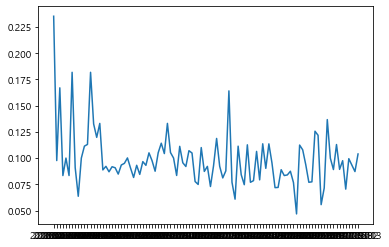

In [177]:
plt.plot(trend.index[:100], trend.topic1[:100])
plt.show()

# 5.Petition_W2V_D2V

In [178]:
import csv

contents = []
labels = []
with open('petition_sample.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row: #그 줄에 내용이 있는 경우에만
            contents.append(row[0]) #청원내용을 contents 리스트에 추가
            labels.append(row[1]) #청원 category를 labels 리스트에 추가

In [179]:
print('documents size:', len(contents))
print('labels:', set(labels))
print('document sample:', contents[0])

documents size: 4000
labels: {'미래', '반려동물', '육아/교육', '일자리'}
document sample: 만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 자영업을 하는 사람입니다.\n국정운영을 너무 잘해주셔서  감사하다는 인사를 먼저드리겠습니다.\n제가 청원 드리고자 하는 사안은 아래와 같습니다.\n그 사안은 개성공단 관련 부분입니다.\n이 사안은 오래전 개성공단이 폐쇄 되고, 그와 관련되어 문제들이 돌출되면서 한번씩 생각해봤습니다.\n개성공단의 상징성은 제가 부연하지 않아도 아주 잘 아실거라 생각 하고 요점만 정리하여 말씀드리겠습니다.\n저는 개성공단을 북측에 꼭 설치 해야되나 하는 의문이 계속 들었습니다.\n북측과 인접한 강원도의 적합한 지역에 제2의 개성공단을  설치하면 안되나 하고 말이지요.\n공단이 설치가 된다면, 강원지역의 경제활성화와 중소기업에 돌아가는 혜택, 북측에 공단이 위치했을때\n지리적 불안전에서 오는 위험 해소, 제2의 개성공단이라는 남북화해의 상징성 등을 두루 갖추지 않을까 싶습니다.\n또한 요즘 처럼 대북관계의 긴장감에서 오는 불안함이 제2의 개성공단 설치로 인하여 대화의 창구를 열어\n관계를 계속 유지해간다면 긴장감이 어느 정도 해소 되지 않을까 싶습니다.\n이상으로 부족한 글 읽어주셔서 감사합니다.


In [180]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(contents, labels, random_state=0)

In [181]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()
#twitter_tag = Twitter()

In [182]:
def tokenize(doc):
    #return list(filter (lambda token: len(token) > 1, twitter_tag.morphs(doc)))
    return list(filter (lambda token: len(token) > 1, twitter_tag.nouns(doc)))

In [183]:
print(twitter_tag.nouns(X_train[1])[:100])

['문재인', '대통령', '국정', '책임', '수고', '항상', '마음속', '응원', '지지', '저', '대기업', '통신사', '협력', '업체', '외주', '노동자', '우리', '문재인', '정부', '서민', '위', '사람', '먼저', '국정', '철학', '부합', '진정', '현실', '좀더', '면', '보고', '우선', '제', '생업', '일자리', '수입', '구조', '말씀', '저', '통신', '공사', '관련', '일', '외주', '노동자', '생활', '년', '가장', '아이', '명', '이일', '아이', '물런', '한번', '안정', '고정', '수입', '우리나라', '통신사', '대기업', '구조', '이', '협력', '업체', '지역구', '어서', '모든', '설치', '시공', '설비', '관련', '장일', '그', '영세', '협력', '업체', '대부분', '외주', '일용직', '노동자', '능직', '이', '의', '관점', '그', '일', '생업', '것', '고정', '여제', '대부분', '건', '얼마', '정액', '제', '수입', '불', '안정', '있을떄', '못']


In [184]:
print(twitter_tag.morphs(X_train[1])[:100])

['문재인', '대통령', '님', ',', '국정', '을', '책임', '지느라', '수고', '가', '많습니다', '항상', '마음속', '으로', '응원', '하고', '지지', '합니다', '\\', 'n', '저', '는', '대기업', '통신사', '들', '의', '협력', '업체', '에서', '일을하는', '외주', '노동자', '입니다', '\\', 'n', '우리', '문재인', '정부', '가', '서민', '을', '위', '하고', '사람', '이', '먼저', '이다', '라는', '국정', '철학', '에', '부합', '하고자', '한다면', '진정', '현실', '을', '\\', 'n', '좀더', '면', '면', '희', '들여다', '보고', '아셔야', '합니다', '안타깝습니다', '\\', 'n', '우선', ',', '제', '가', '생업', '으로', '하고있는', '일자리', '수입', '원', '구조', '부터', '말씀', '드리겠습니다', '\\', 'n', '저', '는', '통신', '공사', '관련', '일', '을', '하고', '있는', '외주', '노동자', '생활', '을', '근']


In [186]:
print(tokenize(X_train[1])[:100])

['문재인', '대통령', '국정', '책임', '수고', '항상', '마음속', '응원', '지지', '대기업', '통신사', '협력', '업체', '외주', '노동자', '우리', '문재인', '정부', '서민', '사람', '먼저', '국정', '철학', '부합', '진정', '현실', '좀더', '보고', '우선', '생업', '일자리', '수입', '구조', '말씀', '통신', '공사', '관련', '외주', '노동자', '생활', '가장', '아이', '이일', '아이', '물런', '한번', '안정', '고정', '수입', '우리나라', '통신사', '대기업', '구조', '협력', '업체', '지역구', '어서', '모든', '설치', '시공', '설비', '관련', '장일', '영세', '협력', '업체', '대부분', '외주', '일용직', '노동자', '능직', '관점', '생업', '고정', '여제', '대부분', '얼마', '정액', '수입', '안정', '있을떄', '실정', '그것', '이일', '종사', '사람', '전국', '적지', '그간', '대기업', '협력', '업체', '갑질', '둘째', '간다', '해도', '임금', '지급', '대기업', '먼저']


In [187]:
train_texts = [tokenize(text) for text in X_train]
test_texts = [tokenize(text) for text in X_test]

In [188]:
print('train text counts:', len(train_texts), ', test text counts:', len(test_texts))
print("train text sample", X_train[1])
print("tokenized result", train_texts[1])
print("test text sample", X_test[0])
print("tokenized result", test_texts[1])

train text counts: 3000 , test text counts: 1000
train text sample 문재인 대통령님, 국정을 책임 지느라 수고가 많습니다 항상 마음속으로 응원하고 지지합니다\n저는 대기업 통신사들의 협력업체 에서 일을하는 외주 노동자 입니다\n우리 문재인 정부가 서민을 위하고 사람이 먼저이다 라는 국정철학에  부합 하고자 한다면 진정 현실을\n좀더 면면희 들여다 보고 아셔야 합니다  안타깝습니다\n우선, 제가 생업으로 하고있는 일자리 수입원 구조부터 말씀 드리겠습니다\n저는 통신공사 관련일을 하고 있는 외주 노동자 생활을 근 20여년 해오고 있는 가장 입니다\n아이가 3명이고 이일을 해서 아이들을 키우고 있습니다\n물런 단한번도 안정적 이고 고정적인 수입이 없었습니다  그러면 우리나라 통신사 대기업들의 구조를\n보면 이들은 협력업체를 지역구에 두어서 모든 설치 시공 설비 관련 현장일을 시키고 있습니다\n그 영세한 협력업체들은 대부분 외주 일용직 노동자 들을 (기능직 이죠) 저의관점 에서는\n그 일을 생업으로 하는 것이 고정급여제가 아니고 대부분 한건당 얼마의 정액제 입니다\n그러다 보니 수입은 불안정 하고 일이 있을떄는 하고 없으면 못하고 그런실정 입니다\n그것까지 탓을 할수는 없다는것은 알고 있습니다\n이일에 종사하는 사람들이 전국에 적지 않습니다,\n그간 대기업들의 협력업체들 에게 갑질이니, 머니 그런것은 둘째로 치고 넘어 간다고 해도\n임금 지급은 당연히 대기업 에서 먼저 물어야 하는데  온갇 이유를 들어 일을한지 월수로는 3개월 인데도\n미비한것이 있다고 하여, 한푼도 지급하지 않고 있는 이런 행태를 과연\n누가 진정 단한사람도 알고나 있는지요\n대기업협력사 들은 고양이 목에 방울거는 형태라 말한마디도 못하고  그 영세한 협력업체들은\n대기업들 에서 정산이 안되었다고 하며 돈을 지급하지 않고\n그러면 그 노동자 들은 어떻겠습니까?\n그런 오랜 악습이 수십년 동안 진행 되다가 지금은 다소 개선이 된줄알고 있는데 예전보다

## Word2Vec
Word2Vec으로 무엇을 할 수 있을까?

In [198]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

In [199]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [200]:
result

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755737066268921),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520533561706543),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517116546631),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [201]:
result = word_vectors.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8965


In [202]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [203]:
!pip install pyemd

similarity = word_vectors.similarity('woman', 'man')
print(similarity > 0.8)

True  Using cached pyemd-0.5.1.tar.gz (91 kB)


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\jiae\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Jiae\\AppData\\Local\\Temp\\pip-install-ma15rtef\\pyemd\\setup.py'"'"'; __file__='"'"'C:\\Users\\Jiae\\AppData\\Local\\Temp\\pip-install-ma15rtef\\pyemd\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Jiae\AppData\Local\Temp\pip-wheel-2n9tskak'
       cwd: C:\Users\Jiae\AppData\Local\Temp\pip-install-ma15rtef\pyemd\
  Complete output (11 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pyemd
  copying pyemd\__about__.py -> build\lib.win-amd64-3.8\pyemd
  copying pyemd\__init__.py -> build\lib.win-amd64-3.8\pyemd
  running build_ext
  building 'pyemd.emd' extension
  er


  Running setup.py clean for pyemd
Failed to build pyemd
    Running setup.py install for pyemd: started
    Running setup.py install for pyemd: finished with status 'error'


In [204]:
result = word_vectors.similar_by_word("cat")
print("{}: {:.4f}".format(*result[0]))

dog: 0.8798


In [205]:
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()

similarity = word_vectors.wmdistance(sentence_obama, sentence_president)
print("{:.4f}".format(similarity))

ModuleNotFoundError: No module named 'pyemd'

In [206]:
distance = word_vectors.distance("media", "media")
print("{:.1f}".format(distance))

0.0


In [207]:
sim = word_vectors.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])
print("{:.4f}".format(sim))

0.7067


In [208]:
vector = word_vectors['computer']  # numpy vector of a word
print(vector.shape)

(100,)


In [209]:
vector = word_vectors.wv.word_vec('office', use_norm=True)
print(vector.shape)

(100,)


<ipython-input-209-b120fd60d724>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vector = word_vectors.wv.word_vec('office', use_norm=True)


#### Word2Vec으로 직접 학습

In [210]:
#train
from gensim.models import word2vec

wv_model_ko = word2vec.Word2Vec(train_texts)
wv_model_ko.init_sims(replace=True)

wv_model_ko.save('petition_sample_w2v.model')

In [211]:
#유사한 단어 추출
print(wv_model_ko.wv.most_similar('청소년'))

[('소년법', 0.993809700012207), ('폐지', 0.9923133850097656), ('악용', 0.9915519952774048), ('범죄', 0.9867984652519226), ('성인', 0.9852649569511414), ('테두리', 0.9822391271591187), ('악한', 0.9803519248962402), ('미성년', 0.975699245929718), ('일진', 0.9727073907852173), ('피해자', 0.9721856713294983)]


In [212]:
# 다른 단어들과 가장 거리가 먼 단어
print(test_texts[0])
wv_model_ko.wv.doesnt_match(test_texts[0])

['저희', '학습', '병행', '제라', '제도', '직장인', '대학생', '저희', '고등학교', '학습', '병행', '제로', '취업', '시작', '완료', '과정', '학습', '병행', '법률', '이상', '학습', '병행', '제도', '실시', '업체', '폐지', '상황', '당장', '이번', '중순', '시기', '이후', '저희', '강제', '학습', '병행', '저희', '지금껏', '시간', '나이', '나이', '지역', '직장', '대학교', '오가면', '직접', '일찍', '혼자', '사회', '생활', '목표', '마음가짐', '이제', '노력', '거품', '대통령', '제발', '포함', '학습', '병행', '친구', '이번', '학습', '병행', '마무리', '시간', '저희', '미래', '가장', '터닝', '포인트']


C:\Users\Jiae\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'대통령'

## Doc2Vec

In [213]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_texts)]
dv_model = Doc2Vec(tagged_data)

In [214]:
dv_train = [dv_model.infer_vector(doc) for doc in train_texts]
dv_test = [dv_model.infer_vector(doc) for doc in test_texts]

In [215]:
len(dv_train)

3000

In [216]:
dv_train[0]

array([-7.41376542e-03, -2.81664240e-03, -8.08939245e-03, -5.18094050e-04,
        8.16436950e-03,  4.88911523e-03, -3.61162284e-03, -5.27157355e-03,
       -5.47679886e-03, -3.75209842e-03, -1.08090220e-02,  8.95692222e-03,
       -1.18697272e-03,  6.59197383e-03,  1.19173415e-02, -1.17183648e-04,
        9.21453722e-03, -2.85867765e-03,  1.23869011e-03,  1.13369450e-02,
        8.84043518e-03, -1.82383566e-03,  4.62387269e-03,  1.04107824e-03,
       -1.95472472e-04, -6.91011269e-03,  1.68383168e-03, -1.16429441e-02,
        5.44766197e-03, -6.92700036e-03, -2.32936232e-03,  3.63256596e-03,
        4.03471291e-03, -7.01452326e-03,  1.91090826e-03,  4.46175132e-03,
        9.43602808e-03,  6.39870763e-03, -8.65144376e-03,  1.09705527e-03,
        5.46929543e-04, -2.57643894e-03, -2.22724723e-03,  3.52790602e-03,
       -3.36771039e-03,  1.95226446e-03, -2.66174087e-03,  6.62454125e-03,
        6.73861708e-03, -4.92972462e-03, -6.56383904e-03,  5.94338262e-03,
        1.36445342e-02,  

In [217]:
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression() #분류기 선언
clf.fit(dv_train, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(dv_train, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(dv_test, y_test))) # test data에 대한 예측정확도

Train set score: 0.679
Test set score: 0.641


In [218]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc_train = scaler.fit_transform(dv_train)
sc_test = scaler.transform(dv_test)

clf.fit(sc_train, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(sc_train, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(sc_test, y_test))) # test data에 대한 예측정확도

Train set score: 0.706
Test set score: 0.670


C:\Users\Jiae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [219]:
dv_model.docvecs.most_similar(1)

[(624, 0.9942513704299927),
 (2016, 0.9942273497581482),
 (274, 0.9933127164840698),
 (2662, 0.9931527972221375),
 (96, 0.9925389885902405),
 (246, 0.992520809173584),
 (2885, 0.9920503497123718),
 (11, 0.9897968769073486),
 (1365, 0.9895216226577759),
 (903, 0.9893827438354492)]

In [220]:
X_train[947]

'인천 연수구에 위치한 해외투자기업과 손잡고 있는 한라그룹 만도 와 독일 헬라 사가 합작하여 만든 회사입니다. 8년정도 된 회사가 엄청난 발전을 하였습니다. 누군가의 의해서.. 그 누군가가 과연\\n어떤 사람들 일까요..? 100% 비정규직으로 구성된\\n생산직과 생산관리,  품질 부서의 노동자들입니다.\\n2~30대 젊은 노동자들이 악덕기업 불법기업 만도헬라\\n정규직 사람들에게 직접적인 업무지시, 폭언, 괄시와 멸시, 무시, 성희롱을 일삼고 근무를 해왔습니다.\\n더이상 비정규직 노동자들은 참지못해 이듬해 2월에\\n노동조합을 결성하였습니다. 노동조합을 설립하자마자 원청회사인 만도헬라에서는 노조탄압과 협박을 하고 도급계약해지와 불안정한 알바고용,\\n원청직원들의 대체생산을 하였습니다. 대한민국의 청년들이 일하는 글로벌기업 공장에서 이게 왠말입니까.. 매년 오르고있는 매출액은 누구의 고생에서 나왔을까요? 비정규직 노동자들입니다.\\n1년365일중 340일을 출근하는 노동자들도 있습니다.\\n그렇게 12시간 주야2교대를 근무해야 가져가는 연봉은 4천만원대.. 정규직은 가방끈이 길다고 주 5일제 8시간 탄력근무제를 적용하여 초봉 5800만원\\n이게 말이됩니까? 해도해도 너무한거 같습니다.\\n문재인 대통령님께서 비정규직 제로화를 공약으로 내걸었습니다. 하지만 바뀐것이 뭐가 있습니까? 아무것도 없습니다. 공공기관만 신경쓰시고 민간기업은 관심조차 없어보입니다.\\n공약으로 내걸었던 비정규직 철폐에 힘써주시기 부탁드립니다!'

In [221]:
X_train[1]

'문재인 대통령님, 국정을 책임 지느라 수고가 많습니다 항상 마음속으로 응원하고 지지합니다\\n저는 대기업 통신사들의 협력업체 에서 일을하는 외주 노동자 입니다\\n우리 문재인 정부가 서민을 위하고 사람이 먼저이다 라는 국정철학에  부합 하고자 한다면 진정 현실을\\n좀더 면면희 들여다 보고 아셔야 합니다  안타깝습니다\\n우선, 제가 생업으로 하고있는 일자리 수입원 구조부터 말씀 드리겠습니다\\n저는 통신공사 관련일을 하고 있는 외주 노동자 생활을 근 20여년 해오고 있는 가장 입니다\\n아이가 3명이고 이일을 해서 아이들을 키우고 있습니다\\n물런 단한번도 안정적 이고 고정적인 수입이 없었습니다  그러면 우리나라 통신사 대기업들의 구조를\\n보면 이들은 협력업체를 지역구에 두어서 모든 설치 시공 설비 관련 현장일을 시키고 있습니다\\n그 영세한 협력업체들은 대부분 외주 일용직 노동자 들을 (기능직 이죠) 저의관점 에서는\\n그 일을 생업으로 하는 것이 고정급여제가 아니고 대부분 한건당 얼마의 정액제 입니다\\n그러다 보니 수입은 불안정 하고 일이 있을떄는 하고 없으면 못하고 그런실정 입니다\\n그것까지 탓을 할수는 없다는것은 알고 있습니다\\n이일에 종사하는 사람들이 전국에 적지 않습니다,\\n그간 대기업들의 협력업체들 에게 갑질이니, 머니 그런것은 둘째로 치고 넘어 간다고 해도\\n임금 지급은 당연히 대기업 에서 먼저 물어야 하는데  온갇 이유를 들어 일을한지 월수로는 3개월 인데도\\n미비한것이 있다고 하여, 한푼도 지급하지 않고 있는 이런 행태를 과연\\n누가 진정 단한사람도 알고나 있는지요\\n대기업협력사 들은 고양이 목에 방울거는 형태라 말한마디도 못하고  그 영세한 협력업체들은\\n대기업들 에서 정산이 안되었다고 하며 돈을 지급하지 않고\\n그러면 그 노동자 들은 어떻겠습니까?\\n그런 오랜 악습이 수십년 동안 진행 되다가 지금은 다소 개선이 된줄알고 있는데 예전보다는 나아졌는데\\n이들 대기업들의 해묵은 악습은 또다시 명절을 앞두고 있는 지금 

# RNN을 이용한 스팸 메일 분류(추가 데이터)
출처 : https://wikidocs.net/22894

In [223]:
#!pip install tensorflow
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

  Using cached tensorflow-2.3.1-cp38-cp38-win_amd64.whl (342.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
Processing c:\users\jiae\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.13.0-py2.py3-none-any.whl (438 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.33.2-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached google_auth-1.23.0-py2.py3-none-any.whl (114 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none

In [224]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')

In [225]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [226]:
data[:5] # 스팸 메일 데이터 중 5개의 행만 출력

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [227]:
del data['Unnamed: 2'] #Unnamed:2 제거
del data['Unnamed: 3'] #Unnamed:3 제거
del data['Unnamed: 4'] #Unnamed:4 제거
data['v1'] = data['v1'].replace(['ham','spam'],[0,1]) # v1열에 있는 ham과 spam 레이블을 각각 숫자 0과 1로 변경
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [228]:
data.info() # 데이터 정보 확인시 v1열은 정수형, v2열은 문자열 데이터를 가지고 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [230]:
data.isnull().values.any()  # null 값이 있는지 확인

False

In [231]:
data['v2'].nunique(), data['v1'].nunique() # 5,572개의 샘플중 v2열에서 중복을 제거한 샘플의 개수가 5,169개 라는 의미
# v1열은 0또는 1의 값만을 가지므로 2가 출력됨

(5169, 2)

In [232]:
data.drop_duplicates(subset=['v2'], inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거

In [233]:
print('총 샘플의 수 :',len(data))  # 중복 샘플이 제거 되었는지 전체 샘플의 수를 확인

총 샘플의 수 : 5169


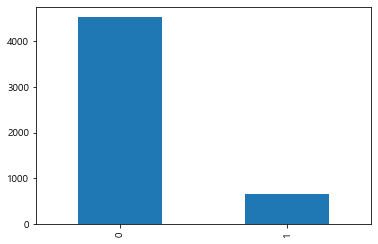

In [234]:
data['v1'].value_counts().plot(kind='bar'); # 스팸 메일 유무를 의미하는 레이블 값의 분포 시각화

In [235]:
print(data.groupby('v1').size().reset_index(name='count'))
# 레이블 0은 총 4,516개 존재, 1은 653개가 존재

   v1  count
0   0   4516
1   1    653


In [236]:
X_data = data['v2'] # v2열을 X로 저장
y_data = data['v1'] # v1열을 Y로 저장
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [237]:
# 케라스 토크나이저를 통한 토큰화와 정수 인코딩 과정

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
# sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

In [240]:
# 5,169개의 메일중 5개의 메일만 출력해서 확인
print(sequences[:5])

# 각 메일에는 단어가 아닌 단어에 대한 인덱스가 부여되어있는 것이 보임

[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767], [53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015], [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152], [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]]


In [241]:
# 각 정수에 어떤 단어가 부여되었는지 확인
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, 'our': 89, "i'll": 90, 'dont': 91, 'reply': 

In [242]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


In [243]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8921


In [245]:
# 전체 메일 데이터 중 80%를 훈련용 데이터로, 20%를 테스트 데이터로 사용
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


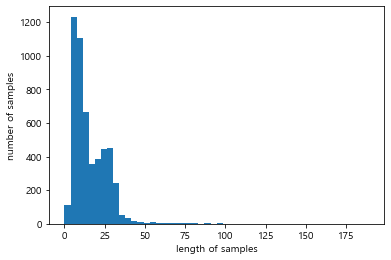

In [246]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [247]:
max_len = 189 # 가장 긴 메일의 길이인 189라는 숫자를 입력
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (5169, 189)


In [248]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

### 바닐라 RNN을 이용하여 스팸 메일 분류하기

In [249]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [250]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 3s 67ms/step - loss: 0.3510 - acc: 0.8824 - val_loss: 0.2313 - val_acc: 0.9021
Epoch 2/4
52/52 [==============================] - 3s 66ms/step - loss: 0.1148 - acc: 0.9674 - val_loss: 0.0777 - val_acc: 0.9770
Epoch 3/4
52/52 [==============================] - 3s 59ms/step - loss: 0.0571 - acc: 0.9852 - val_loss: 0.0642 - val_acc: 0.9831
Epoch 4/4
52/52 [==============================] - 3s 58ms/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.1090 - val_acc: 0.9541


In [251]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 11ms/step - loss: 0.1275 - acc: 0.9497

 테스트 정확도: 0.9497


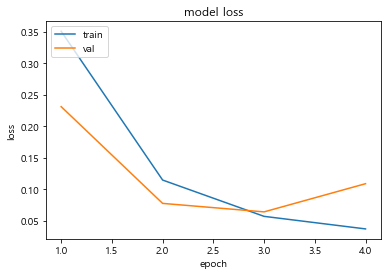

In [252]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 이 데이터는 에포크 5를 넘어가면 검증 데이터의 오차가 증가하는 경향이 있다.